In [1]:
!pip install seaborn imbalanced-learn

In [2]:
###For stroke data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
stroke = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
##Data Cleaning
#Drop id column 
stroke.drop(columns='id', inplace=True)

In [5]:
#Handle missing value
stroke.isna().sum()
stroke.dropna(how='any', inplace=True) #droping all of them.

In [6]:
stroke.shape

(4909, 11)

In [7]:
stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [9]:
numeric_vars = ["age", "avg_glucose_level", "bmi"]
categorical_vars = ["gender", "hypertension", "heart_disease", "ever_married", 
                    "work_type", "Residence_type", "smoking_status"]


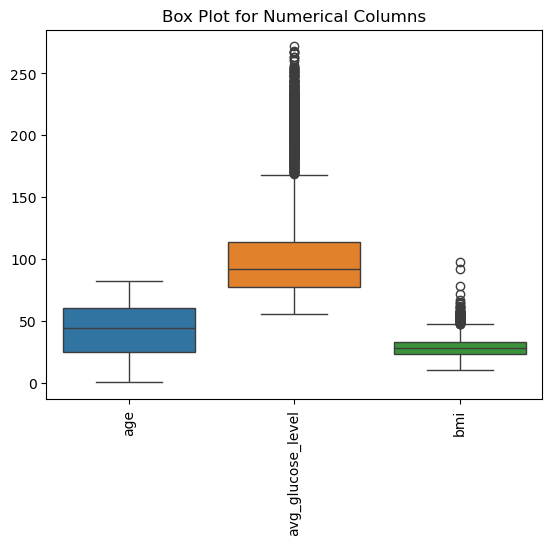

In [10]:
#check outliers
sns.boxplot(data=stroke[numeric_vars])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Box Plot for Numerical Columns')
plt.show()

In [11]:
#we will remove the outlier in glucose and bmi
def remove_outliers(df, columns):
    for column in columns: 
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

stroke = remove_outliers(stroke, ["avg_glucose_level", "bmi"])

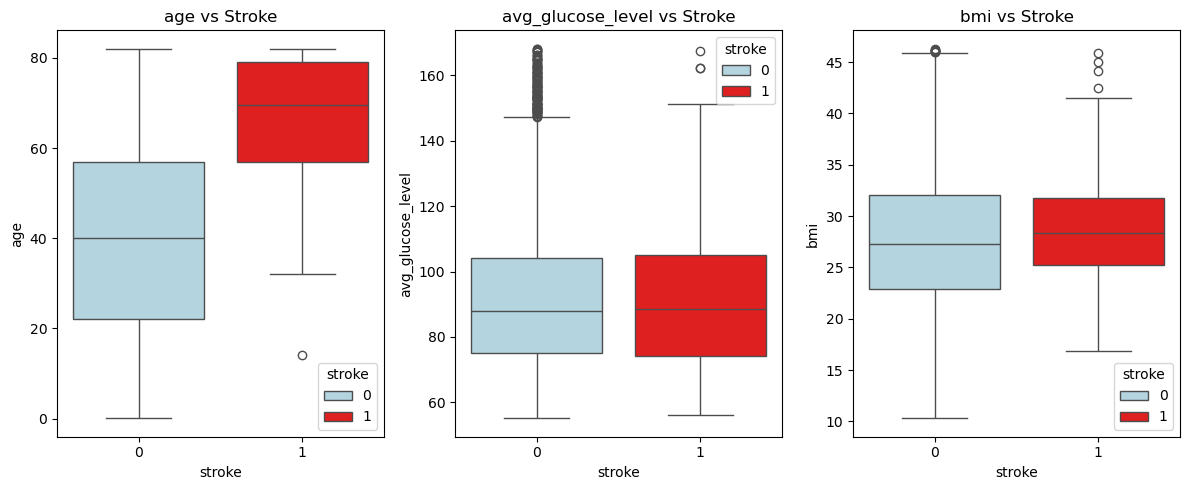

In [12]:
#Data visualization
plt.figure(figsize=(12, 5))

for i, var in enumerate(numeric_vars):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x="stroke", y=stroke[var], data=stroke, hue="stroke", palette=["lightblue", "red"])
    plt.title(f"{var} vs Stroke")

plt.tight_layout()
plt.show()

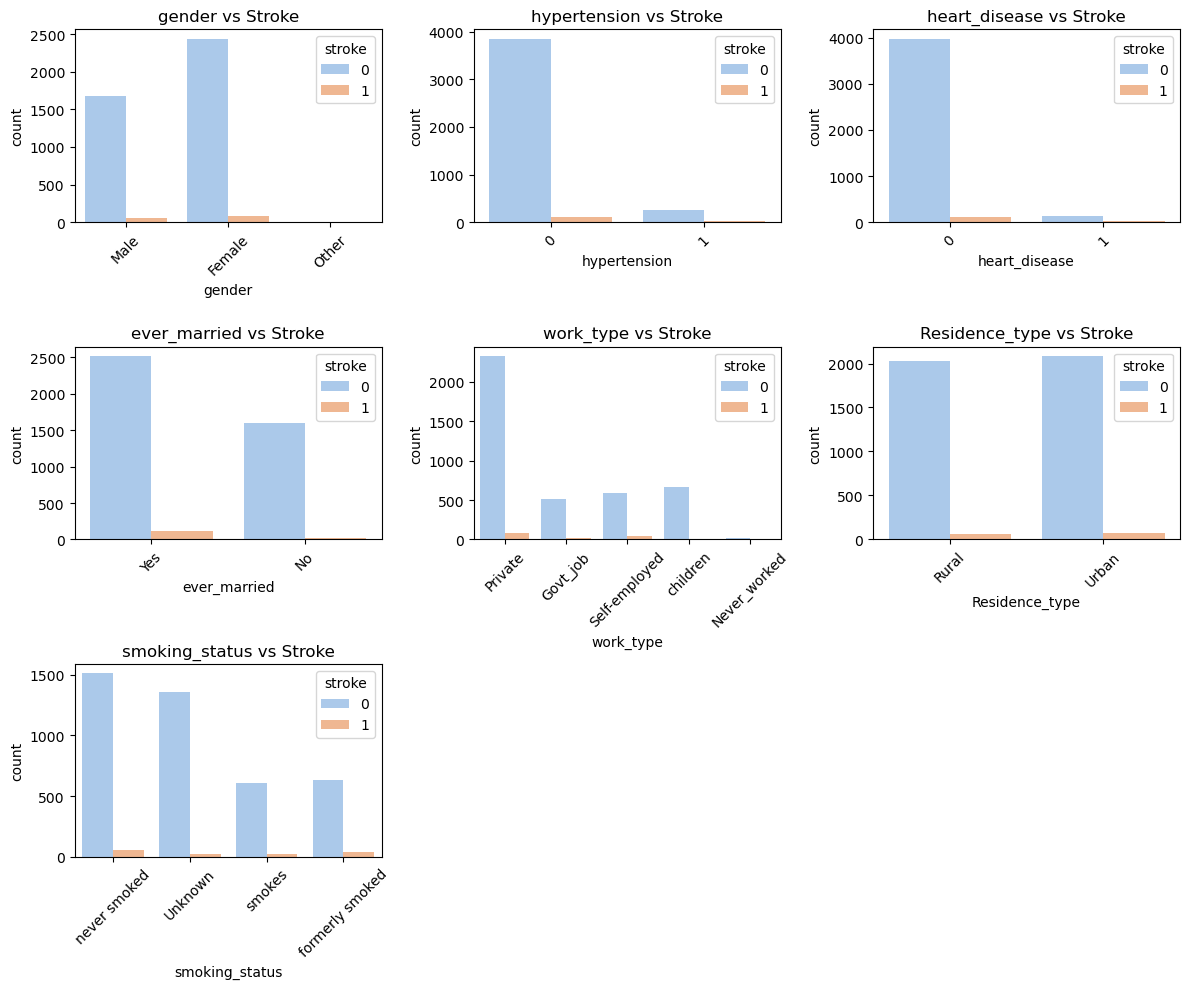

In [13]:
plt.figure(figsize=(12, 10))

for i, var in enumerate(categorical_vars):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=stroke[var], hue=stroke["stroke"], data=stroke, palette="pastel")
    plt.xticks(rotation=45)
    plt.title(f"{var} vs Stroke")

plt.tight_layout()
plt.show()


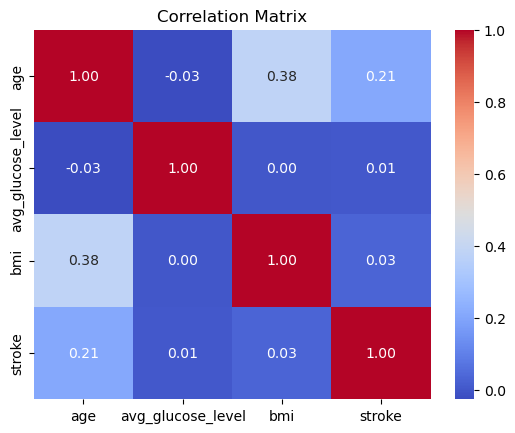

In [14]:
sns.heatmap(stroke[numeric_vars + ["stroke"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [15]:
##Data processing
label_encoder = LabelEncoder()
binary_vars = [ "hypertension","heart_disease", "ever_married", "Residence_type"]
for var in binary_vars:
    stroke[var] = label_encoder.fit_transform(stroke[var])

stroke = pd.get_dummies(stroke, columns=["gender","work_type", "smoking_status"], drop_first=True)
stroke= stroke.astype(int)
stroke.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,80,0,1,1,0,105,32,1,1,0,0,1,0,0,0,1,0
6,74,1,1,1,0,70,27,1,1,0,0,1,0,0,0,1,0
7,69,0,0,0,1,94,22,1,0,0,0,1,0,0,0,1,0
9,78,0,0,1,1,58,24,1,0,0,0,1,0,0,0,0,0
10,81,1,0,1,0,80,29,1,0,0,0,1,0,0,0,1,0


In [16]:
X = stroke.drop(columns=['stroke', 'bmi']) #correlation between stroke and bmi is too small
y = stroke["stroke"]  

#standardization
scaler = StandardScaler()
stroke_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)  

#split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(stroke_scaled, y, test_size=0.3, random_state=123)

stroke_scaled.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.753284,-0.271546,5.141231,0.782194,-1.014689,0.614904,1.209162,-0.015337,-0.072118,0.875089,-0.41628,-0.42942,-0.432489,1.307672,-0.418999
1,1.486383,3.682614,5.141231,0.782194,-1.014689,-0.925565,1.209162,-0.015337,-0.072118,0.875089,-0.41628,-0.42942,-0.432489,1.307672,-0.418999
2,1.263964,-0.271546,-0.194506,-1.278456,0.985523,0.130757,-0.827019,-0.015337,-0.072118,0.875089,-0.41628,-0.42942,-0.432489,1.307672,-0.418999
3,1.664317,-0.271546,-0.194506,0.782194,0.985523,-1.453726,-0.827019,-0.015337,-0.072118,0.875089,-0.41628,-0.42942,-0.432489,-0.764718,-0.418999
4,1.797768,3.682614,-0.194506,0.782194,-1.014689,-0.485431,-0.827019,-0.015337,-0.072118,0.875089,-0.41628,-0.42942,-0.432489,1.307672,-0.418999


In [17]:
from sklearn.linear_model import LassoCV

#use LASSO to do the feature selection
lasso = LassoCV(cv=5, random_state=123)  
lasso.fit(X_train, y_train)

selected_features = X_train.columns[lasso.coef_ != 0]
print("Selected Features:", selected_features)

Selected Features: Index(['age', 'hypertension', 'heart_disease', 'ever_married', 'gender_Male',
       'work_type_children', 'smoking_status_formerly smoked'],
      dtype='object')


In [18]:
X_train = X_train[selected_features]
X_test= X_test[selected_features]

X_train.head()

,age,hypertension,heart_disease,ever_married,gender_Male,work_type_children,smoking_status_formerly smoked
3654,-1.805405,-0.271546,-0.194506,-1.278456,-0.827019,2.328725,-0.432489
1817,0.641194,-0.271546,-0.194506,0.782194,-0.827019,-0.429420,-0.432489
1233,0.062907,-0.271546,-0.194506,0.782194,1.209162,-0.429420,-0.432489
208,1.130514,-0.271546,-0.194506,0.782194,-0.827019,-0.429420,-0.432489
431,1.842251,-0.271546,-0.194506,-1.278456,1.209162,-0.429420,-0.432489


In [19]:
#create a logistic regression model
logistic_regression = LogisticRegression()
# Fit the model to the training data
logistic_regression.fit(X_train, y_train)
y_pred_log = logistic_regression.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1242
           1       0.00      0.00      0.00        34

    accuracy                           0.97      1276
   macro avg       0.49      0.50      0.49      1276
weighted avg       0.95      0.97      0.96      1276



/Users/taraaa/miniforge3/envs/dasc_5410/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/taraaa/miniforge3/envs/dasc_5410/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/taraaa/miniforge3/envs/dasc_5410/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [20]:
#define the function for confusion matrix
def plot_confusion_matrix(y_test, y_prediction):
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    ax.set_xlabel('Prediced labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Don\'t Had Stroke', 'Had Stroke'])
    ax.yaxis.set_ticklabels(['Don\'t Had Stroke', 'Had Stroke']) 
    plt.show()

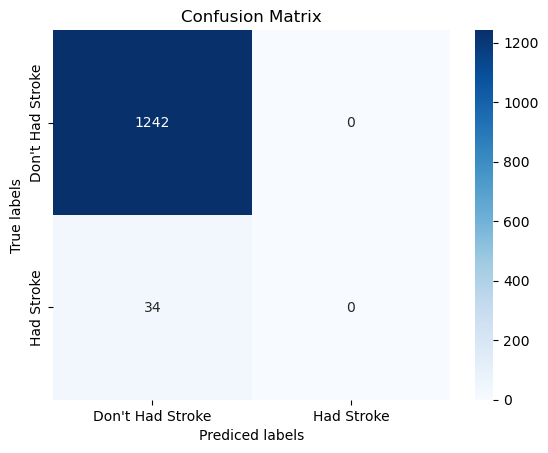

In [21]:
plot_confusion_matrix(y_test, y_pred_log)

In [22]:
#calculate the sensitivity and specificity
cm_log = confusion_matrix(y_test, y_pred_log)
TN, FP, FN, TP = cm_log.ravel()
sensitivity = TP / (TP + FN)  
specificity = TN / (TN + FP)  
print(f"Sensitivity: {sensitivity:.2f}") #likely due to class imbalance (few stroke cases)
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.00
Specificity: 1.00


In [23]:
#Adjust class weights to handle imbalanced data
logistic_regression2 = LogisticRegression(class_weight="balanced")  #model assigns higher weights to stroke=1
logistic_regression2.fit(X_train, y_train)

y_pred_log2 = logistic_regression2.predict(X_test)
print(classification_report(y_test, y_pred_log2))

cm_log2 = confusion_matrix(y_test, y_pred_log2)
TN, FP, FN, TP = cm_log2.ravel()
sensitivity = TP / (TP + FN)   
specificity = TN / (TN + FP)  
print(f"Sensitivity: {sensitivity:.2f}") 
print(f"Specificity: {specificity:.2f}")

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1242
           1       0.07      0.71      0.12        34

    accuracy                           0.74      1276
   macro avg       0.53      0.72      0.49      1276
weighted avg       0.96      0.74      0.83      1276

Sensitivity: 0.71
Specificity: 0.74


In [24]:
#use SMOTE to handle reduce class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
X_train_balanced,y_train_balanced = smote.fit_resample(X_train, y_train)
logistic_regression3=LogisticRegression()
logistic_regression3.fit(X_train_balanced,y_train_balanced)
y_pred_log3 = logistic_regression3.predict(X_test)
print(classification_report(y_test,y_pred_log3))

cm_log3 = confusion_matrix(y_test, y_pred_log3)
TN, FP, FN, TP = cm_log3.ravel()
sensitivity = TP / (TP + FN)   
specificity = TN / (TN + FP)  
print(f"Sensitivity: {sensitivity:.2f}") 
print(f"Specificity: {specificity:.2f}")

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1242
           1       0.07      0.71      0.13        34

    accuracy                           0.74      1276
   macro avg       0.53      0.72      0.49      1276
weighted avg       0.96      0.74      0.83      1276

Sensitivity: 0.71
Specificity: 0.74


Best k based on Elbow Method: 7


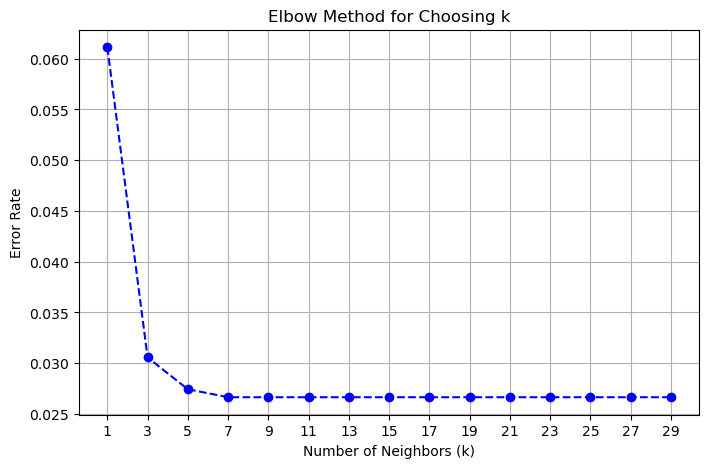

In [25]:
#KNN

#use the elbow method to find the best k
k_values = range(1, 30, 2)  
error_rates = []  

# compute error rate for different k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  
    y_pred = knn.predict(X_test)  
    error = 1 - accuracy_score(y_test, y_pred)  
    error_rates.append(error)

# plot k vs. error rate 
plt.figure(figsize=(8, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.title("Elbow Method for Choosing k")
plt.xticks(k_values)  
plt.grid(True)

best_k = k_values[np.argmin(error_rates)]
print(f"Best k based on Elbow Method: {best_k}")

plt.show()

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1242
           1       0.00      0.00      0.00        34

    accuracy                           0.97      1276
   macro avg       0.49      0.50      0.49      1276
weighted avg       0.95      0.97      0.96      1276



/Users/taraaa/miniforge3/envs/dasc_5410/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/taraaa/miniforge3/envs/dasc_5410/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/taraaa/miniforge3/envs/dasc_5410/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

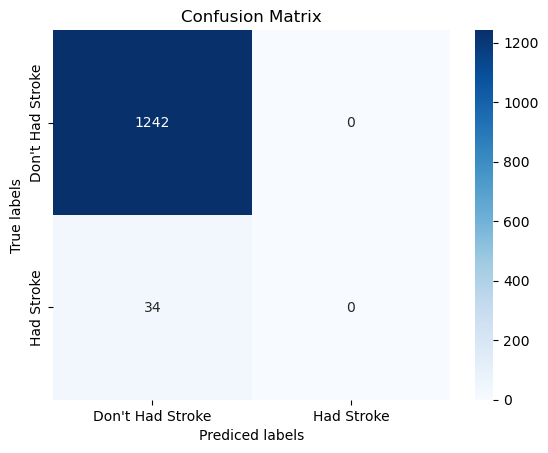

In [26]:
# use the optimal k for the model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)  # Train the model on the full training set
y_pred_knn = knn.predict(X_test)

print(classification_report(y_test, y_pred_knn))

#display the confusion matrix
plot_confusion_matrix(y_test, y_pred_knn)


In [27]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
TN, FP, FN, TP = cm_knn.ravel()
sensitivity = TP / (TP + FN)   
specificity = TN / (TN + FP)  
print(f"Sensitivity: {sensitivity:.2f}") 
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.00
Specificity: 1.00


In [28]:
from imblearn.over_sampling import SMOTE

#we will use smote to balance the data and decrease k to increase the sensitivity (class_weight doesn't apply to knn)
smote = SMOTE(sampling_strategy='auto', random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

knn2 = KNeighborsClassifier(n_neighbors=3, weights="distance")
knn2.fit(X_train_resampled, y_train_resampled)
y_pred_knn2 = knn2.predict(X_test)

print(classification_report(y_test, y_pred_knn2))

cm_knn2 = confusion_matrix(y_test, y_pred_knn2)
TN, FP, FN, TP = cm_knn2.ravel()
sensitivity = TP / (TP + FN)   
specificity = TN / (TN + FP)  
print(f"Sensitivity: {sensitivity:.2f}") 
print(f"Specificity: {specificity:.2f}")

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1242
           1       0.09      0.15      0.11        34

    accuracy                           0.94      1276
   macro avg       0.53      0.55      0.54      1276
weighted avg       0.95      0.94      0.95      1276

Sensitivity: 0.15
Specificity: 0.96


              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1242
           1       0.00      0.00      0.00        34

    accuracy                           0.97      1276
   macro avg       0.49      0.50      0.49      1276
weighted avg       0.95      0.97      0.96      1276



/Users/taraaa/miniforge3/envs/dasc_5410/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/taraaa/miniforge3/envs/dasc_5410/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/taraaa/miniforge3/envs/dasc_5410/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

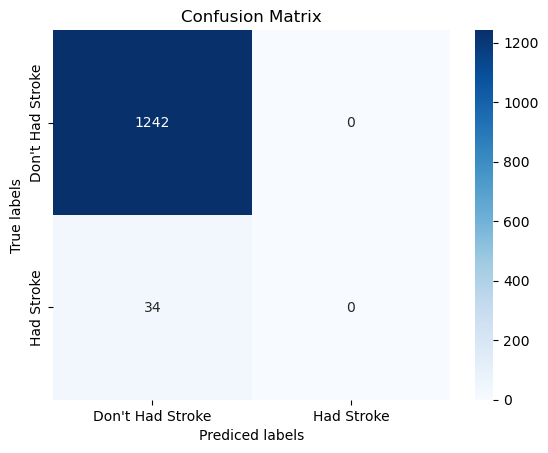

Sensitivity: 0.00
Specificity: 1.00


In [29]:
##neural networks

#basic model
mlp_baseline = MLPClassifier(hidden_layer_sizes=(100,),  
                             activation='relu',       
                             solver='adam',           
                             max_iter=1000,           
                             random_state=123)

mlp_baseline.fit(X_train, y_train)
y_pred_nn_baseline = mlp_baseline.predict(X_test)

print(classification_report(y_test, y_pred_nn_baseline))
plot_confusion_matrix(y_test, y_pred_nn_baseline)

cm_nn_baseline = confusion_matrix(y_test, y_pred_nn_baseline)
TN, FP, FN, TP = cm_nn_baseline.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

In [30]:
#adjustment
smote = SMOTE(sampling_strategy='auto', random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

mlp_balanced = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000,random_state=123)
mlp_balanced.fit(X_train_resampled, y_train_resampled)


y_pred_nn_balanced = mlp_balanced.predict(X_test)
print(classification_report(y_test, y_pred_nn_balanced))

cm_nn_balanced = confusion_matrix(y_test, y_pred_nn_balanced)
TN, FP, FN, TP = cm_nn_balanced.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

              precision    recall  f1-score   support

           0       0.99      0.80      0.88      1242
           1       0.08      0.68      0.15        34

    accuracy                           0.79      1276
   macro avg       0.54      0.74      0.52      1276
weighted avg       0.96      0.79      0.86      1276

Sensitivity: 0.68
Specificity: 0.80
